# Basketball field goal rate

**Scenario:** We model the *field goal rate* of basketball players. A player's field goal rate is an important factor in how valuable they are to the team. The field goal rate is simply the number of throws made divided by the number of throws attempted during normal play in basketball. [Video: NBA 10 longest ever field goals.](https://www.youtube.com/watch?v=BSLYEzMMmLI)

**Data:** The number of field goals attempted (FGA) and made (FGM) are tracked for important basketball divisions, so we have lots of data available. See the FGM-FGA column on [this page](http://www.espn.com/nba/player/gamelog/_/id/2594922/otto-porter-jr). The FG% column is simply FGM / FGA (assuming FGA is not 0).

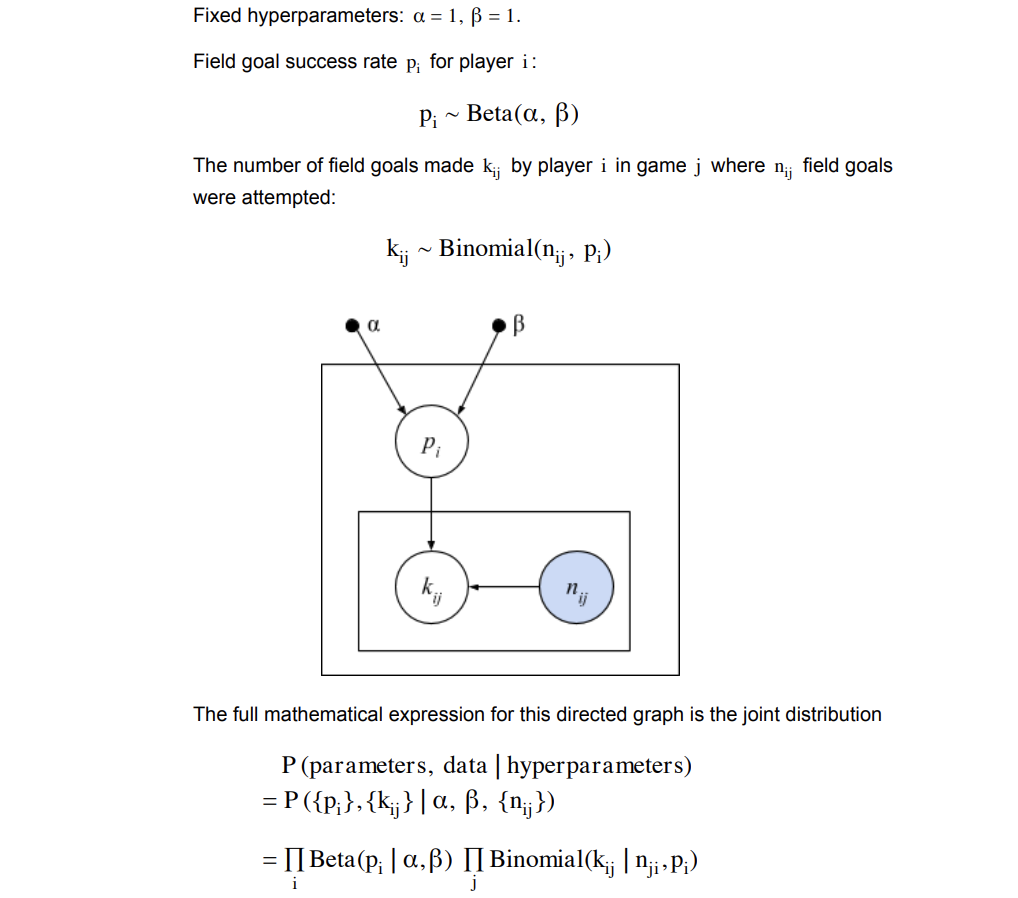

In [1]:
from PIL import Image
Image.open('PCW_description')

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Field goal rate data. Each tuple contains (field goals made, field goals attempted).
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7), (5, 10), (4, 7), (0, 0), (5, 8), (4, 9)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17), (7, 13), (6, 13), (8, 18), (4, 9), (4, 13)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13), (2, 4), (5, 13), (8, 10), (7, 16), (4, 6)],
}

In [6]:
### Note: Trouble with accessing the FGA, will likely affect code below...
n_field_goals_attempted_array = []
for player in player_field_goal_data: 
    n_field_goals_attempted_array.append(player_field_goal_data[player][:, 2])
    
n_field_goals_attempted_array

TypeError: list indices must be integers or slices, not tuple

We start by modeling a single basketball player the same way we did medical trial data, by assuming that their field goal rate is consistent between games. The generative model is that a player's field goal rate, $p_i$ for player $i$, comes from a $\text{Beta}(1,1)$ distribution (a uniform distribution). When the player plays a game where they get $n_{ij}$ field goal attempts, the number of successes $k_{ij}$ comes from a $\text{Binomial}(n_{ij}, p_i)$ distribution.

The code below implements this model and estimates the field goal rate for 3 different players from the data given.

**Task:** Read through the code below and make sure you understand it. Discuss with other students if that helps.

In [3]:
"""Each player gets given an expected field goal rate from the uniform distribution. The
expected field goal rate is always the same in all their games. In any particular
game, the number of successful field goals is given by a binomial distribution."""

for player in player_field_goal_data.keys():
    
    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = sts.beta(alpha_prior, beta_prior)

    # Likelihood: Binomial distribution
    total_successes = sum(game[0] for game in player_field_goal_data[player])
    total_failures = sum(game[1] - game[0] for game in player_field_goal_data[player])

    # Posterior for probability of success: Beta distribution
    alpha_post = alpha_prior + total_successes
    beta_post = beta_prior + total_failures
    posterior_field_goal_rate_p = sts.beta(alpha_post, beta_post)
    
    # Posterior for number of field goals made: Binomial distribution
    n_field_goals_attempted_array = player[:, 2] # Issue with accessing FGA here...
    p = posterior_field_goal_rate_p.pdf
    for n in n_field_goals_attempted_array:
        field_goals_made_k = sts.binomial(n, p)

    plt.figure(figsize=(8,4))
    plot_x = np.linspace(0, 1, 200)
    plot_y = posterior_field_goal_rate_p.pdf(plot_x)
    plt.plot(plot_x, plot_y)
    plt.title('Posterior over FG% for ' + player)
    
    plt.figure(figsize=(8,4))
    plot_x = np.linspace(0, 1, 200)
    plot_y = field_goals_made_k.pdf(plot_x)
    plt.plot(plot_x, plot_y)
    plt.title('Posterior over FGA% for ' + player)

plt.show()

TypeError: string indices must be integers